# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [47]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable


In [48]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2024.12.14-py3-none-any.whl (164 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


In [49]:
!pip install numpy pandas matplotlib requests beautifulsoup4 pillow SQLAlchemy scikit-learn seaborn 

!pip install Openpyxl

!pip install SQLAlchemy

!pip install SQLAlchemy





Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [50]:
# Importando bibliotecas para cálculos e manipulação de dados
import numpy as np  # Biblioteca para cálculos numéricos
import pandas as pd  # Biblioteca para manipulação de dados tabulares

# Importando bibliotecas para visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos
import seaborn as sns  # Gráficos avançados baseados em matplotlib

# Importando bibliotecas para comunicação web e parsing
import requests  # Realizar requisições HTTP
from bs4 import BeautifulSoup  # Parsing de HTML

# Importando biblioteca para manipulação de imagens
from PIL import Image  # Parte do pacote Pillow

# Importando biblioteca para aprendizado de máquina
from sklearn.model_selection import train_test_split  # Divisão de dados para treinamento e teste
from sklearn.linear_model import LinearRegression  # Exemplo de modelo de regressão linear



**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: *FILL IN* (e.g., CSV File.)

Method: *FILL IN* (e.g., The data was gathered using the "Downloading files" method from X source.)

Dataset variables:

*   *Variable 1 FILL IN* (e.g., H_MEAN: Mean hourly wage)
*   *Variable 2 FILL IN*

In [51]:
#FILL IN 1st data gathering and loading method

file1 = 'netflix_titles.csv'  # Caminho do arquivo manualmente baixado
df_dataset1 = pd.read_csv(file1)
print(df_dataset1.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [52]:
#check number variables and data samples

def check_dataset(df):

    try:
         # Obter número de variáveis (colunas) e amostras (linhas)
        num_columns = df.shape[1]
        num_rows = df.shape[0]
        
        # Verificar os critérios
        if num_columns >= 2 and num_rows > 500:
            return f"OK, at least two variables and more than 500 data samples."
        else:
            return (f"not OK."
                    f"Colunas: {num_columns} (mínimo: 2), Linhas: {num_rows} (mínimo: 501).")
    except Exception as e:
        return f"Error"

print(check_dataset(df_dataset1))


OK, at least two variables and more than 500 data samples.


### Explanation

I chose the dataset about "Netflix Movies and TV Shows" because it contains detailed information about popular movies and shows, which allows us to perform analysis on the origin (country) of each movie. This will allow me to analyze which countries are most involved in media production, and how this may correlate with each nation's GDP.

The dataset was manually collected by downloading the CSV file directly from Netflix's public data site or from sources like Kaggle that make the data available for analysis.

From my analysis, the names and meanings of the variables are:

ID: Unique identifier for each movie or TV show.

Type: Indicates whether the item is a movie or a TV show.

Title: The name of the movie or TV show.

Director: Name of the director responsible for the work.

Cast: Actors who participate in the production.

Country: Country where the movie or show was produced.

Date Added: Date the movie or show was added to the Netflix platform.

Release Year: Year of original release of the production.
Rating: Rating of the movie or show (e.g. PG, PG-13, etc.).
Duration: Length of time the movie ran or number of seasons in the case of a TV show.

#### Dataset 2

Type: *FILL IN* (e.g., CSV File.)

Method: *FILL IN* (e.g., The data was gathered using the "API" method from Y source.)

Dataset variables:

*   *Variable 1 FILL IN* (e.g., H_MEAN: Mean hourly wage)
*   *Variable 2 FILL IN*

In [53]:
#FILL IN 2nd data gathering and loading method
# URL da API do Banco Mundial
url = "https://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD?date=2000:2020&format=json&per_page=20000"

# Requisição para a API
response = requests.get(url)
if response.status_code != 200:
    print("Erro ao acessar a API.")
    exit()

# Processar a resposta JSON
data = response.json()

# Criar uma lista para armazenar os dados processados
gdp_data = []

# Verificar se há dados válidos
if len(data) > 1 and data[1]:
    for record in data[1]:
        if record['value'] is not None:  # Verifica se o PIB está disponível
            gdp_data.append({
                "País": record['country']['value'],
                "Ano": record['date'],
                "PIB (US$)": record['value']
            })

# Converter para DataFrame do Pandas
df = pd.DataFrame(gdp_data)

# Salvar em um arquivo CSV
df.to_csv("pib_global.csv", index=False, encoding='utf-8-sig')

print("Data saved in 'pib_global.csv'.")

Data saved in 'pib_global.csv'.


In [54]:
df_dataset2 = pd.read_csv("pib_global.csv")
print(df_dataset2.head(10))

                          País   Ano     PIB (US$)
0  Africa Eastern and Southern  2020  9.333918e+11
1  Africa Eastern and Southern  2019  1.009721e+12
2  Africa Eastern and Southern  2018  1.012306e+12
3  Africa Eastern and Southern  2017  9.729989e+11
4  Africa Eastern and Southern  2016  8.289428e+11
5  Africa Eastern and Southern  2015  8.982778e+11
6  Africa Eastern and Southern  2014  9.787083e+11
7  Africa Eastern and Southern  2013  9.623949e+11
8  Africa Eastern and Southern  2012  9.529986e+11
9  Africa Eastern and Southern  2011  9.454391e+11


In [55]:
#check number variables and data samples

def check_dataset(df):

    try:
         # Obter número de variáveis (colunas) e amostras (linhas)
        num_columns = df.shape[1]
        num_rows = df.shape[0]
        
        # Verificar os critérios
        if num_columns >= 2 and num_rows > 500:
            return f"OK, at least two variables and more than 500 data samples."
        else:
            return (f"not OK."
                    f"Colunas: {num_columns} (mínimo: 2), Linhas: {num_rows} (mínimo: 501).")
    except Exception as e:
        return f"Error"

print(check_dataset(df_dataset2))

OK, at least two variables and more than 500 data samples.


### Explanation

I chose the dataset on countries' GDP to correlate with the production of films and TV shows, with the aim of analyzing whether there is any relationship between a country's economic growth and its production of audiovisual content, such as films and shows.

The dataset was collected through public sources of economic data, such as the World Bank or other international databases, which provide information on each country's GDP over the years. The CSV file was downloaded directly from a public repository (URL).

Names and Meaning of Variables:

Country Name: Name of the country being analyzed.

Year: Reference year for GDP data.

Total GDP: Total value of the country's Gross Domestic Product in the specified year, in dollars.


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [56]:
#Optional: store the raw data in your local data store


### inspecting the datas

In [57]:
#inspecting the datas

print(df_dataset1.head())
print(df_dataset2.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [58]:
print(df_dataset1.tail())
print(df_dataset2.tail())

     show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R   

In [59]:
#inspecting the datas
print(df_dataset1.sample(10))

     show_id     type                             title         director  \
4007   s4008    Movie  Jeff Dunham: Arguing with Myself  Manny Rodriguez   
7180   s7181    Movie       Kevin Hart: Seriously Funny  Shannon Hartman   
4379   s4380  TV Show                      Eternal Love              NaN   
4719   s4720    Movie                      7 Khoon Maaf  Vishal Bhardwaj   
7762   s7763  TV Show   Power Rangers Dino Super Charge              NaN   
6280   s6281    Movie                   Below Her Mouth     April Mullen   
6767   s6768    Movie                   Flash of Genius     Marc Abraham   
2223   s2224  TV Show    Killer Women with Piers Morgan              NaN   
7244   s7245    Movie                   Kurt & Courtney  Nick Broomfield   
7131   s7132  TV Show                        JingleKids              NaN   

                                                   cast  \
4007                                        Jeff Dunham   
7180                                         

In [60]:
#inspecting the datas
#displays the number of rows and columns, which helps you get a sense of the overall structure of the dataframe
print(df_dataset1.shape) #netflix
print(df_dataset2.shape) #pib

(8807, 12)
(5421, 3)


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [61]:
#FILL IN - Inspecting the dataframe visually

In [62]:
print(df_dataset1.head())
print(df_dataset2.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [63]:
#FILL IN - Inspecting the dataframe programmaticall

In [64]:
#returns a dataframe with boolean valuesm indicating whether the data is null. 
#With sum(), you can count how many missing values there are per column.

print(df_dataset1.isnull().sum())
print()
print(df_dataset2.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

País         0
Ano          0
PIB (US$)    0
dtype: int64


In [65]:
exemplos_paises_nulos = df_dataset1[df_dataset1['country'].isnull()].head(3)
print(exemplos_paises_nulos)

  show_id     type                  title         director  \
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
5      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast country  \
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...     NaN   
3                                                NaN     NaN   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...     NaN   

           date_added  release_year rating  duration  \
2  September 24, 2021          2021  TV-MA  1 Season   
3  September 24, 2021          2021  TV-MA  1 Season   
5  September 24, 2021          2021  TV-MA  1 Season   

                                           listed_in  \
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
5                 TV Dramas, TV Horror, TV Mysteries   

                                         des

Issue and justification: *FILL IN*

There are null values within base 1 that needed to be adjusted. In the cleaning stage, I will focus only on the columns that I will use to answer the main question of the study.

### Quality Issue 2:

In [66]:
#FILL IN - Inspecting the dataframe visually

In [67]:
print(df_dataset2.head())

                          País   Ano     PIB (US$)
0  Africa Eastern and Southern  2020  9.333918e+11
1  Africa Eastern and Southern  2019  1.009721e+12
2  Africa Eastern and Southern  2018  1.012306e+12
3  Africa Eastern and Southern  2017  9.729989e+11
4  Africa Eastern and Southern  2016  8.289428e+11


In [68]:
#FILL IN - Inspecting the dataframe programmaticall

In [69]:
print(df_dataset2['PIB (US$)'].isnull().sum())

0


In [70]:
duplicatas_dataset1 = df_dataset1.duplicated().sum()
duplicatas_dataset2 = df_dataset2.duplicated().sum()

print(duplicatas_dataset1)
print(duplicatas_dataset2)
print()

# Verificar valores nulos na coluna 'release_year' do df_dataset1
anos_nulos_dataset1 = df_dataset1['release_year'].isnull().sum()
print(f"Número de valores nulos na coluna 'release_year' do df_dataset1: {anos_nulos_dataset1}")

# Verificar valores nulos na coluna 'Ano' do df_dataset2
anos_nulos_dataset2 = df_dataset2['Ano'].isnull().sum()
print(f"Número de valores nulos na coluna 'Ano' do df_dataset2: {anos_nulos_dataset2}")


0
0

Número de valores nulos na coluna 'release_year' do df_dataset1: 0
Número de valores nulos na coluna 'Ano' do df_dataset2: 0


Issue and justification: *FILL IN*

Although we did not identify any duplicate rows and no rows without a GDP(PIB) value in the first column and no null values in the years column of both datasets, we identified that the GDP value is not rounded. This will be done in the second stage of data cleaning and manipulation.


### Tidiness Issue 1:

In [71]:
#FILL IN - Inspecting the dataframe visually
print(df_dataset1.head())
print(df_dataset2.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [72]:
#FILL IN - Inspecting the dataframe programmatically
for col in df_dataset1.columns:
    print(f"{col}: {df_dataset1[col].nunique()} unique values")

    
for col in df_dataset2.columns:
    print(f"{col}: {df_dataset2[col].nunique()} unique values")

show_id: 8807 unique values
type: 2 unique values
title: 8807 unique values
director: 4528 unique values
cast: 7692 unique values
country: 748 unique values
date_added: 1767 unique values
release_year: 74 unique values
rating: 17 unique values
duration: 220 unique values
listed_in: 514 unique values
description: 8775 unique values
País: 262 unique values
Ano: 21 unique values
PIB (US$): 5379 unique values


In [73]:
print(df_dataset1.sample(55))

     show_id     type                                              title  \
8098   s8099    Movie                                    Story of an Egg   
1460   s1461  TV Show                                            Monarca   
810     s811    Movie                                    Streets of Fire   
7509   s7510    Movie                                               Moor   
2550   s2551    Movie                                        18 Presents   
1198   s1199    Movie               RebellComedy: Straight Outta the Zoo   
2472   s2473  TV Show                                             Betaal   
7647   s7648    Movie                                      Oklahoma City   
4257   s4258  TV Show                                      Selection Day   
6037   s6038  TV Show                                        A Good Wife   
5416   s5417    Movie                          Chris D'Elia: Man on Fire   
8682   s8683    Movie                                    Vizontele Tuuba   
1430   s1431

In [74]:
for col in ['country']:
    print(f"{col}: {df_dataset1[col].unique()}")

country: ['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United States' 'United 

In [75]:
paises_com_asp = df_dataset1[df_dataset1['country'].str.contains(',', na=False)]

# Exibir os países encontrados
print(paises_com_asp['country'].unique())

['United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'Germany, Czech Republic' 'United States, India, France'
 'China, Canada, United States' 'South Africa, United States, Japan'
 'Spain, United States' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States'
 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong'
 'United States, China, Hong Kong' 'Italy, United States'
 'United States, Germany' 'United Kingdom, Canada, United States'
 ', South Korea' 'India, Nepal'
 'New Zealand, Australia, France, United States' 'Italy, Brazil, Greece'
 'United States, Japan' 'Belgium, Unit

Issue and justification: *FILL IN*

I have identified that in the countries column there are lines with several production countries separated by commas. As a premise, we will keep only the first country indicated in each line. This step will be carried out in the cleaning stage.

### Tidiness Issue 2: 

In [76]:
#FILL IN - Inspecting the dataframe visually
print(df_dataset2.sample(55))

                                               País   Ano     PIB (US$)
5228                                        Uruguay  2013  6.133762e+10
441                                       IDA total  2020  2.450267e+12
990                                           World  2017  8.171204e+13
2433                               French Polynesia  2005  5.705052e+09
1541                                       Botswana  2010  1.263727e+10
3465                                       Maldives  2013  3.295009e+09
372                                       IBRD only  2005  9.656466e+12
1917                               Congo, Dem. Rep.  2005  1.196448e+10
5053                                        Turkiye  2000  2.742946e+11
130                             East Asia & Pacific  2016  2.278179e+13
2217                                    El Salvador  2020  2.492119e+10
3580                                      Mauritius  2003  5.894874e+09
2084                                        Czechia  2006  1.562

In [77]:
#FILL IN - Inspecting the dataframe programmatically
# Inspecionar valores únicos em colunas relevantes
for col in ['País', 'Ano']:
    print(f"{col}: {df_dataset2[col].unique()}")

País: ['Africa Eastern and Southern' 'Africa Western and Central' 'Arab World'
 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD coun

In [78]:
# Filtrar linhas em que o nome do país contém uma vírgula
paises_com_virgula = df_dataset2[df_dataset2['País'].str.contains(',', na=False)]

# Exibir os países encontrados
print(paises_com_virgula['País'].unique())

['Bahamas, The' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Egypt, Arab Rep.'
 'Gambia, The' 'Hong Kong SAR, China' 'Iran, Islamic Rep.' 'Korea, Rep.'
 'Macao SAR, China' 'Micronesia, Fed. Sts.' 'Venezuela, RB' 'Yemen, Rep.']


Issue and justification: *FILL IN*

I identified that in the countries column there are also lines that contain the full name of a country separated by a comma. As a premise, we will keep only the main first name of the country for these cases. This step will be carried out in the cleaning stage.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [79]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted

### **Quality Issue 1: FILL IN**

In [80]:
# FILL IN - Apply the cleaning strategy

In [81]:
df_dataset1 = df_dataset1.dropna(subset=['country'])

In [82]:
# FILL IN - Validate the cleaning was successful

In [83]:
print(df_dataset1['country'].isnull().sum())  # Deve retornar 0

0


In [84]:
print(df_dataset1.isnull().sum())
print()
print(df_dataset2.isnull().sum())

show_id            0
type               0
title              0
director        2225
cast             671
country            0
date_added         9
release_year       0
rating             3
duration           3
listed_in          0
description        0
dtype: int64

País         0
Ano          0
PIB (US$)    0
dtype: int64


Justification: *FILL IN*

The first problem was the existence of null data in dataset 1. focused on the Countries column, which will be the main information to answer the objective question of the study. Therefore, we excluded from the database the lines whose country information was null.

### **Quality Issue 2: FILL IN**

In [85]:
#FILL IN - Apply the cleaning strategy

In [86]:
df_dataset2['PIB (US$)'] = df_dataset2['PIB (US$)'].round(2)

In [87]:
#FILL IN - Validate the cleaning was successful

In [88]:
print(df_dataset2.head())

                          País   Ano     PIB (US$)
0  Africa Eastern and Southern  2020  9.333918e+11
1  Africa Eastern and Southern  2019  1.009721e+12
2  Africa Eastern and Southern  2018  1.012306e+12
3  Africa Eastern and Southern  2017  9.729989e+11
4  Africa Eastern and Southern  2016  8.289428e+11


Justification: *FILL IN*

I rounded the GDP value of each country to two decimal places.

### **Tidiness Issue 1: FILL IN**

In [89]:
#FILL IN - Apply the cleaning strategy
df_dataset1['country'] = df_dataset1['country'].str.split(',').str[0].str.strip()

In [90]:
#FILL IN - Validate the cleaning was successful
print("Países únicos no dataset1:")
print(df_dataset1['country'].unique())

Países únicos no dataset1:
['United States' 'South Africa' 'India' 'United Kingdom' 'Germany'
 'Mexico' 'Turkey' 'Australia' 'Finland' 'China' 'Nigeria' 'Japan' 'Spain'
 'France' 'Belgium' 'South Korea' 'Argentina' 'Russia' 'Canada'
 'Hong Kong' 'Italy' '' 'Ireland' 'New Zealand' 'Jordan' 'Colombia'
 'Switzerland' 'Israel' 'Brazil' 'Taiwan' 'Bulgaria' 'Poland'
 'Saudi Arabia' 'Thailand' 'Indonesia' 'Egypt' 'Kuwait' 'Malaysia'
 'Vietnam' 'Sweden' 'Lebanon' 'Romania' 'Philippines' 'Iceland' 'Denmark'
 'United Arab Emirates' 'Netherlands' 'Norway' 'Syria' 'Mauritius'
 'Austria' 'Czech Republic' 'Cameroon' 'Uruguay' 'Kenya' 'Chile'
 'Luxembourg' 'Bangladesh' 'Portugal' 'Hungary' 'Senegal' 'Singapore'
 'Serbia' 'Namibia' 'Peru' 'Mozambique' 'Belarus' 'Ghana' 'Zimbabwe'
 'Puerto Rico' 'Pakistan' 'Cyprus' 'Paraguay' 'Croatia' 'Cambodia'
 'Georgia' 'Soviet Union' 'Greece' 'West Germany' 'Iran' 'Venezuela'
 'Slovenia' 'Guatemala' 'Ukraine' 'Jamaica' 'Somalia']


Justification: *FILL IN*

I was able to perform the cleaning, leaving only the name of the first country in each line.

### **Tidiness Issue 2: FILL IN**

In [91]:
#FILL IN - Apply the cleaning strategy
df_dataset2['País'] = df_dataset2['País'].str.split(',').str[0].str.strip()


In [92]:
#FILL IN - Validate the cleaning was successful
print("Países únicos no dataset2:")
print(df_dataset2['País'].unique())

Países únicos no dataset2:
['Africa Eastern and Southern' 'Africa Western and Central' 'Arab World'
 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Af

Justification: *FILL IN*
I was able to perform the cleaning, leaving only the name of the first country in each line.

### **Preprocessing of data**

Looking at the describe, we identified that the GDP value column in dataset 2 is missing the "_" in the name. This will be corrected in the next step. In addition, they had upper and lower case letters in the column names.
In addicional, I identified that the "data added" column was not classified in the correct data type. In addition, there was space between the dates that needed to be adjusted.

In [93]:
#Descriptive statistics about the numeric columns, such as mean, standard deviation, minimum and maximum values, and more. 
#This can help you spot anomalies or errors in your data.
print(df_dataset2.describe())

               Ano     PIB (US$)
count  5421.000000  5.421000e+03
mean   2010.027117  1.966886e+12
std       6.036283  7.274090e+12
min    2000.000000  1.396473e+07
25%    2005.000000  5.859270e+09
50%    2010.000000  3.477253e+10
75%    2015.000000  4.091917e+11
max    2020.000000  8.814985e+13


In [94]:
#Visual Assessment: examining the column headers with df.columns to see if the column names are consistent (e.g., no abbreviations or capitalization inconsistencies).
print(df_dataset2.columns)

Index(['País', 'Ano', 'PIB (US$)'], dtype='object')


In [95]:
colunas_padronizadas = all(col == col.lower() and ' ' not in col for col in df_dataset2.columns)

if colunas_padronizadas:
    print("The column names are standardized (lower case and no spaces).")
else:
    print("The column names are NOT standardized. Here are the current columns:")
    print(df.columns)

The column names are NOT standardized. Here are the current columns:
Index(['País', 'Ano', 'PIB (US$)'], dtype='object')


In [101]:
#Visual Assessment: Checking the data types of columns with df.dtypes to identify whether the columns have appropriate data types.

print(df_dataset1.dtypes)
print()
print(df_dataset2.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

país          object
ano            int64
pib_(us$)    float64
dtype: object


In [102]:
#Programmatic Assessment: I used df.info() to check the data type of each column and evaluate if its's necessary to convert columns to the appropriate data type.
# Visualizar os primeiros valores para entender os padrões gerais
print("Exemplo de valores na coluna 'date_added':")
print(df_dataset1['date_added'].head(10))

# Identificar valores únicos para entender formatos
print("\nExemplo de formatos únicos na coluna 'date_added':")
print(df_dataset1['date_added'].dropna().unique()[:10])  # Mostra os 10 primeiros valores únicos

Exemplo de valores na coluna 'date_added':
0    2021-09-25
1    2021-09-24
4    2021-09-24
7    2021-09-24
8    2021-09-24
9    2021-09-24
12   2021-09-23
15   2021-09-22
17   2021-09-22
21   2021-09-22
Name: date_added, dtype: datetime64[ns]

Exemplo de formatos únicos na coluna 'date_added':
<DatetimeArray>
['2021-09-25 00:00:00', '2021-09-24 00:00:00', '2021-09-23 00:00:00',
 '2021-09-22 00:00:00', '2021-09-21 00:00:00', '2021-09-20 00:00:00',
 '2021-09-19 00:00:00', '2021-09-17 00:00:00', '2021-09-16 00:00:00',
 '2021-09-15 00:00:00']
Length: 10, dtype: datetime64[ns]


In [103]:
#Programmatic Evaluation: the df.columns.str.lower() function can be used to standardize column names to lowercase, making the code easier to access and read.
df_dataset2.columns = df_dataset2.columns.str.lower().str.replace(' ','_')

In [104]:
print(df_dataset2.columns)

Index(['país', 'ano', 'pib_(us$)'], dtype='object')


I performed the correct classification of each type of information in each column.
Now, the column names are standardized (lower case and no spaces).

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [106]:
#FILL IN - Remove unnecessary variables and combine datasets

# Unir os datasets com base no país e no ano
df_unido = pd.merge(df_dataset1, df_dataset2, left_on=['country', 'release_year'], right_on=['país', 'ano'], how='left')

# Exibir as primeiras linhas para verificar o resultado
print(df_unido.head())

  show_id     type                          title         director  \
0      s1    Movie           Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show                  Blood & Water              NaN   
2      s5  TV Show                   Kota Factory              NaN   
3      s8    Movie                        Sankofa     Haile Gerima   
4      s9  TV Show  The Great British Baking Show  Andy Devonshire   

                                                cast         country  \
0                                                NaN   United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...    South Africa   
2  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...           India   
3  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   United States   
4  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 

In [107]:
print(df_unido['país'].isnull().sum())

1347


In [108]:
df_unido2 = df_unido.dropna(subset=['país'])

In [109]:
print(df_unido2['país'].isnull().sum())  # Deve retornar 0

0


I merged the two databases and cleaned the rows for which there was no GDP value for that respective country/year.

In [110]:
print(df_unido2.head())

   show_id     type                 title         director  \
0       s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
8      s18  TV Show       Falsa identidad              NaN   
12     s28    Movie             Grown Ups     Dennis Dugan   
13     s29    Movie            Dark Skies    Scott Stewart   
14     s30    Movie              Paranoia   Robert Luketic   

                                                 cast        country  \
0                                                 NaN  United States   
8   Luis Ernesto Franco, Camila Sodi, Sergio Goyri...         Mexico   
12  Adam Sandler, Kevin James, Chris Rock, David S...  United States   
13  Keri Russell, Josh Hamilton, J.K. Simmons, Dak...  United States   
14  Liam Hemsworth, Gary Oldman, Amber Heard, Harr...  United States   

   date_added  release_year rating   duration  \
0  2021-09-25          2020  PG-13     90 min   
8  2021-09-22          2020  TV-MA  2 Seasons   
12 2021-09-20          2010  PG-13    103 min  

In [111]:
paises_unicos_unidos = df_unido2['country'].unique()

# Exibindo os países únicos
print(paises_unicos_unidos)

['United States' 'Mexico' 'United Kingdom' 'Finland' 'China'
 'South Africa' 'India' 'Japan' 'Nigeria' 'Spain' 'Germany' 'Australia'
 'Argentina' 'Canada' 'France' 'Ireland' 'Italy' 'Switzerland' 'Colombia'
 'Brazil' 'Bulgaria' 'Kuwait' 'Malaysia' 'Indonesia' 'Belgium' 'Lebanon'
 'Romania' 'Thailand' 'Philippines' 'Denmark' 'United Arab Emirates'
 'Egypt' 'Austria' 'Israel' 'Cameroon' 'Kenya' 'Chile' 'Uruguay'
 'Luxembourg' 'Bangladesh' 'Poland' 'Portugal' 'Norway' 'Senegal'
 'Netherlands' 'Saudi Arabia' 'Singapore' 'Iceland' 'Sweden' 'Serbia'
 'New Zealand' 'Namibia' 'Peru' 'Mozambique' 'Belarus' 'Ghana' 'Zimbabwe'
 'Puerto Rico' 'Hungary' 'Pakistan' 'Cyprus' 'Mauritius' 'Jordan'
 'Paraguay' 'Croatia' 'Cambodia' 'Georgia' 'Greece' 'Iran' 'Slovenia'
 'Venezuela' 'Guatemala' 'Ukraine' 'Jamaica' 'Somalia']


In [112]:
#removing unnecessary columns

df_unido3 = df_unido2.drop(columns=['show_id', 'description', 'cast', 'director', 'duration'])

# Exibir o dataframe resultante
print(df_unido3.head())

       type                 title        country date_added  release_year  \
0     Movie  Dick Johnson Is Dead  United States 2021-09-25          2020   
8   TV Show       Falsa identidad         Mexico 2021-09-22          2020   
12    Movie             Grown Ups  United States 2021-09-20          2010   
13    Movie            Dark Skies  United States 2021-09-19          2013   
14    Movie              Paranoia  United States 2021-09-19          2013   

   rating                                          listed_in           país  \
0   PG-13                                      Documentaries  United States   
8   TV-MA  Crime TV Shows, Spanish-Language TV Shows, TV ...         Mexico   
12  PG-13                                           Comedies  United States   
13  PG-13                    Horror Movies, Sci-Fi & Fantasy  United States   
14  PG-13                                          Thrillers  United States   

       ano     pib_(us$)  
0   2020.0  2.135410e+13  
8   2020

In [113]:
print(df_unido3.dtypes)

type                    object
title                   object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
listed_in               object
país                    object
ano                    float64
pib_(us$)              float64
dtype: object


In [114]:
df_unido3['ano'] = df_unido3['ano'].astype(int)
print(df_unido3.dtypes)

type                    object
title                   object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
listed_in               object
país                    object
ano                      int64
pib_(us$)              float64
dtype: object


I identified that when performing the merge, the year of dataset2 was transformed from int to float. I made the adjustment.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [115]:
#FILL IN - saving data

df_unido3.to_csv('cleaned_data_merged.csv',index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

I want to analyze the film production of a country and its respective GDPs.

Question: Is there any correlation between the media production of a country and its GDP?

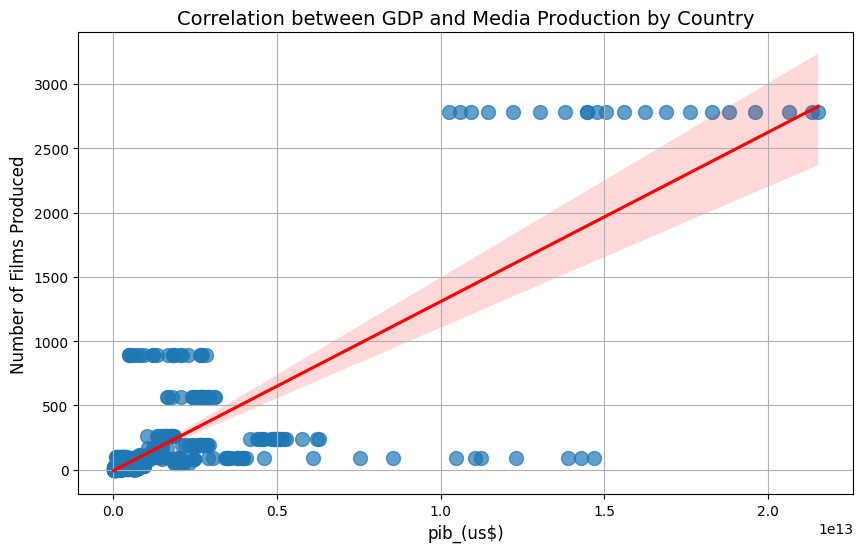

In [116]:
#Visual 1 - FILL IN

# Calcular o número de filmes por país
df_unido3['num_filmes'] = df_unido3.groupby('country')['title'].transform('count')

# Eliminar linhas duplicadas para que cada país tenha apenas uma linha no gráfico
df_unique = df_unido3[['country', 'num_filmes', 'pib_(us$)']].drop_duplicates()

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.regplot(x='pib_(us$)', y='num_filmes', data=df_unique, scatter_kws={'s': 100, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Correlation between GDP and Media Production by Country', fontsize=14)
plt.xlabel('pib_(us$)', fontsize=12)
plt.ylabel('Number of Films Produced', fontsize=12)
plt.grid(True)
plt.show()

Graph Description

X-Axis (GDP): Each country’s GDP is shown on the horizontal axis. The further to the right, the higher the country’s GDP.

Y-Axis (Number of Movies Produced): The number of movies is shown on the vertical axis. Countries that have a higher film production will appear higher on the graph.

Trend Line: The red line represents a linear regression that indicates the trend in the relationship between GDP and the number of movies. If the line is sloping upward, this suggests a positive correlation (i.e., countries with higher GDP tend to produce more movies).

Scatter Plots: Each dot on the graph represents a country. If there is a concentration of dots in specific areas, it may indicate that certain groups of countries have a different relationship between their GDP and media production.

*Answer to research question:* FILL IN
A scatter plot with a trend line allows you to visually observe the relationship between GDP and media production. If there is a positive correlation, the graph will show that countries with higher GDPs tend to have higher film production, which may suggest that wealthier countries have more resources for media production.

The correlation between GDP and the number of films is positive, indicating that countries with greater economic power tend to invest more in media production.

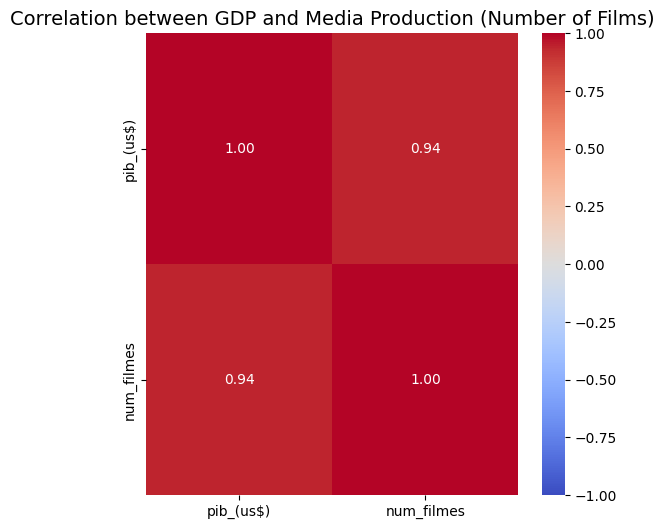

In [117]:
#Visual 2 - FILL IN
# Calcular a correlação entre PIB e número de filmes
correlation_matrix = df_unido3[['pib_(us$)', 'num_filmes']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', cbar=True)
plt.title('Correlation between GDP and Media Production (Number of Films)', fontsize=14)
plt.show()

Graph Description

Heat Map: The heat map shows the strength and direction of the correlation between GDP and film production. The warmer color (red) indicates a strong positive correlation, while the cooler color (blue) indicates a negative correlation.

Numerical values: The value displayed within each cell shows the exact correlation between the two variables. For example, a value of 0.85 would indicate a very strong positive correlation, while -0.85 would indicate a strong negative correlation.

Colors: The color palette used (coolwarm) ranges from red (strong positive correlation) to blue (strong negative correlation). Values close to 0 indicate a weak or non-existent correlation between the variables.

*Answer to research question:* FILL IN

The heat map concisely presents the correlation between GDP and film production. A high correlation value (close to 1 or -1) indicates a stronger relationship between the variables, while values ​​close to 0 suggest that the variables are not strongly related. This helps to quickly see if there is a consistent trend between the variables.

Again, the correlation between GDP and the number of films is positive, indicating that countries with greater economic power tend to invest more in media production.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* 

If I had more time to complete the project, I would devote more attention to cleaning and standardizing the data, ensuring that all values ​​were well formatted. I would also seek to analyze other data from the film database, such as the percentage of film and series productions in each country, or whether the type of production (e.g. documentaries or science fiction) is related to the country's GDP. In addition, I would explore in more depth the variables that can influence media production, such as government investment and cultural characteristics, to improve the analysis of the correlation between GDP and film production. I would also apply regression models to verify more complex relationships and deepen the analysis of country and year variables, considering possible outliers or distortions.